In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Reading the IMDb data with pandas
df = pd.read_csv('./data/IMDb_movies.csv')

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cleaning the IMDb data. First we fix some typo in the **'worldwide_gross_income'** column, transform the **'year'** attribute into integers, filter the data in the desired range, transform all attributes representing money to integers and remove the currencies (**'budget'**, **'worldwide_gross_income'** nad **'usa_gross_income'**). Finally we deal with tha dates, by changing the strings to datetime objects.

In [74]:
def clean_imdb(df):
    imdb = df.rename(columns = {'worlwide_gross_income':'worldwide_gross_income'})
    imdb = imdb.drop(imdb.index[83917])
    imdb['year'] = imdb['year'].astype(int)
    imdb = imdb[imdb['year']>2014]
    imdb = imdb.dropna()
    imdb['budget'] = imdb['budget'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['worldwide_gross_income'] = imdb['worldwide_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['usa_gross_income'] = imdb['usa_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['date_published'] = pd.to_datetime(imdb['date_published'])
    return imdb

imdb = clean_imdb(df)

We decided to work with the ten most successful movies in terms of usa gross income from 2015 to 2020

In [75]:
movies = imdb.sort_values(['usa_gross_income'], ascending=False).groupby('year').head(10)
movies.shape

(60, 22)

In [5]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worldwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [6]:
movies.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000
mean,2017.500000,121.950000,7.023333,357702.116667,1.537917e+08,3.494225e+08,9.245040e+08,63.000000,2021.400000,461.983333
std,1.722237,19.915436,0.828797,241041.596783,8.179124e+07,1.942177e+08,5.219527e+08,14.397504,2165.603616,187.490700
min,2015.000000,85.000000,4.200000,2646.000000,7.000000e+06,1.729108e+07,2.069078e+07,22.000000,80.000000,63.000000
25%,2016.000000,106.000000,6.500000,165434.750000,8.487500e+07,2.263650e+08,6.522968e+08,54.500000,736.500000,332.750000
50%,2017.500000,123.000000,7.050000,306714.500000,1.600000e+08,3.357485e+08,8.804208e+08,64.500000,1307.500000,457.500000
75%,2019.000000,136.250000,7.625000,548393.250000,2.000000e+08,4.286319e+08,1.149697e+09,73.250000,2205.500000,615.250000
max,2020.000000,181.000000,8.500000,882037.000000,3.560000e+08,9.366622e+08,2.797801e+09,94.000000,10472.000000,909.000000


let's check the genres of the selected movies

<BarContainer object of 16 artists>

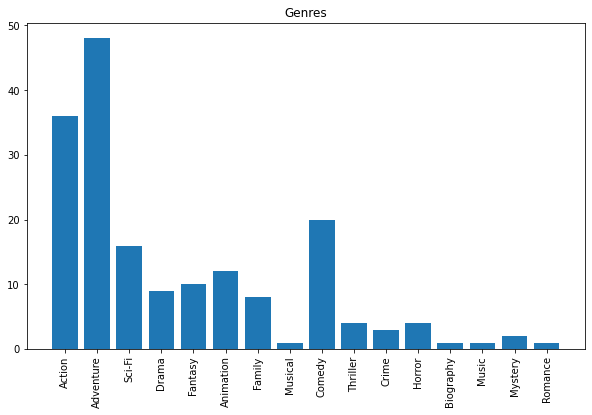

In [7]:
from collections import Counter
genres = [genres.split() for genres in movies['genre'].tolist()]
labels, values = zip(*Counter([genre.replace(',', '') for genre_list in genres for genre in genre_list]).items())
plt.figure(figsize = (10,6))
plt.title('Genres')
plt.xticks(rotation=90)
plt.bar(labels, values)

Now let's visualize the IMDb ratings as well, we scatter the critics' ratings (metascore) against the users' raatings (avg_vote)

<AxesSubplot:title={'center':'Ratings'}, xlabel='avg_vote', ylabel='metascore'>

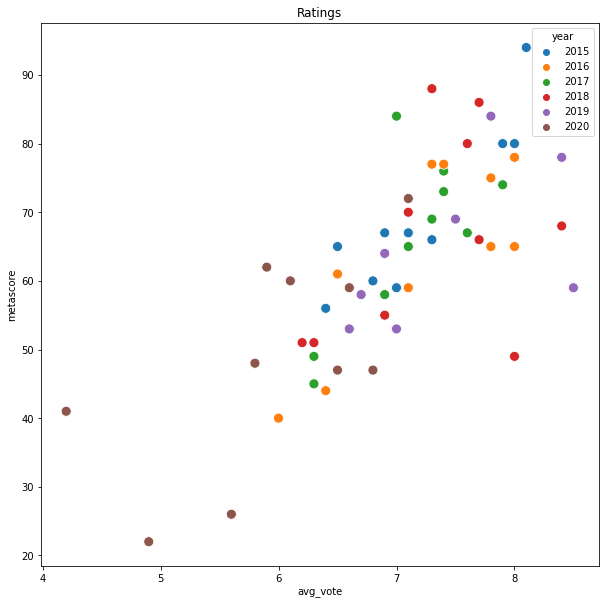

In [8]:
plt.figure(figsize = (10,10))
plt.title('Ratings')
sns.scatterplot(data=movies, x="avg_vote", y="metascore", hue='year', palette='tab10', s=100)

We could also scatter the budget against the box office, it looks like in 2020 producers spent less money on movies and also less people went to the cinama. This has something to do with COVID-19, looks like we have a confounder. So we should keep this in mind in our project later!

<AxesSubplot:title={'center':'Ratings'}, xlabel='budget', ylabel='usa_gross_income'>

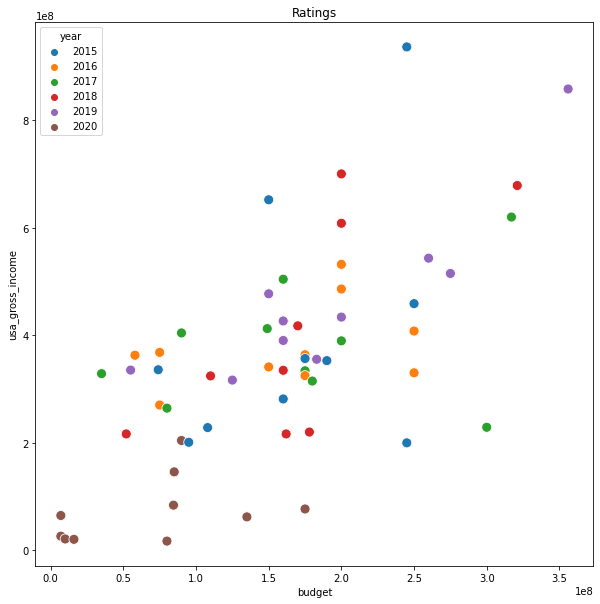

In [9]:
plt.figure(figsize = (10,10))
plt.title('Ratings')
sns.scatterplot(data=movies, x='budget', y='usa_gross_income', hue='year', palette='tab10', s=100)

Now we take a look at the distribution of the votes and total incomes, we denote the median with red dotted line

In [10]:
mean = movies['avg_vote'].median()
std = movies['avg_vote'].std()
print(f'       mean        of movie rating: {"{:.2f}".format(mean)}')
print(f'standard deviation of movie rating: {"{:.2f}".format(std)}')

       mean        of movie rating: 7.05
standard deviation of movie rating: 0.83


<AxesSubplot:title={'center':'IMDb rating'}, xlabel='avg_vote', ylabel='Count'>

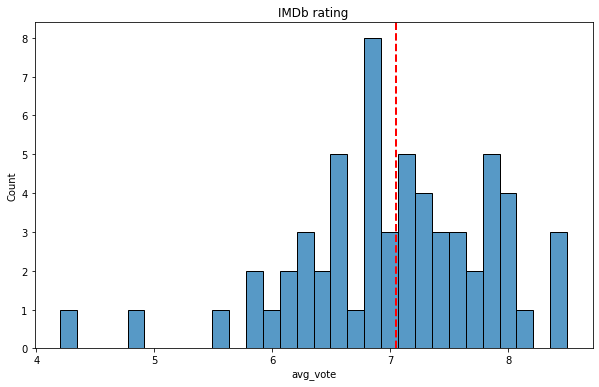

In [11]:
plt.figure(figsize = (10,6))
plt.title('IMDb rating')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['avg_vote'], bins=30)

In [12]:
median = movies['usa_gross_income'].median()
std = movies['usa_gross_income'].std()
print(f'      median       of usa gross income: $ {"{:.2f}".format(median)}')
print(f'standard deviation of usa gross income: $ {"{:.2f}".format(std)}')

      median       of usa gross income: $ 335748540.50
standard deviation of usa gross income: $ 194217686.55


<AxesSubplot:title={'center':'Box office log scale'}, xlabel='usa_gross_income', ylabel='Count'>

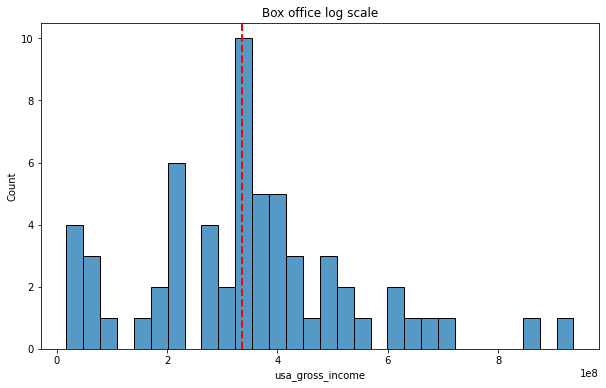

In [15]:
plt.figure(figsize = (10,6))
plt.title('Box office log scale')
plt.axvline(movies['usa_gross_income'].median(), color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['usa_gross_income'], bins=30)

Now we filter the Quotebank data based and look for quotes on the above mentioned movies. We search for the title of the movie in the **'quotation'** field of the Quotebank data. 

In [17]:
#TODO: here we shoul include the data processing code snippet

In [30]:
quotes_2015 = pd.read_json('./data/Quotebank/quotes-2015-movies.json.bz2', lines=True)
quotes_2016 = pd.read_json('./data/Quotebank/quotes-2016-movies.json.bz2', lines=True)
quotes_2017 = pd.read_json('./data/Quotebank/quotes-2017-movies.json.bz2', lines=True)
quotes_2018 = pd.read_json('./data/Quotebank/quotes-2018-movies.json.bz2', lines=True)
quotes_2019 = pd.read_json('./data/Quotebank/quotes-2019-movies.json.bz2', lines=True)
quotes_2020 = pd.read_json('./data/Quotebank/quotes-2020-movies.json.bz2', lines=True) 

We can count the number of quotes found in a movie in the year of release, although it does not tell the full story, let us consider the number of occurances as well

In [35]:
quotes_2019.groupby('movie').count()['quotation'].sort_values(ascending=False)

movie
Onward                                                                 261
Birds of Prey: And the Fantabulous Emancipation of One Harley Quinn     97
Tenet                                                                   70
Sonic the Hedgehog                                                      53
Dolittle                                                                41
The Invisible Man                                                       39
Bad Boys for Life                                                       10
The Call of the Wild                                                     3
Name: quotation, dtype: int64

One thing we can spot is that frozen only has 71 quotes which seems unreasonably few. We can explain this by looking the release dates of the movies. Frozen was released at the end of November, so the movie did not really have the time to accumulate the quotes. On the other hand, movies like Star Wars or Joker did receive a lot of quotations. A possibility would be to look for quotes on these movies in other years as well.

In [47]:
quotes_2019

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,movie
0,2019-02-03-035259,"Onwards and upwards, we've got to look at it p...",David Drew,"[Q15457830, Q5233072, Q56427827, Q728653]",2019-02-03 07:32:34,7,"[[David Drew, 0.9465], [None, 0.0495], [Erin B...",[http://www.brisbanetimes.com.au/sport/cricket...,E,Onward
1,2019-05-24-017082,"Dimple Kapadia and Clemence Poesy, the French ...",Dimple Kapadia,[Q158558],2019-05-24 19:19:22,1,"[[Dimple Kapadia, 0.749], [None, 0.1498], [Chr...",[https://www.bollywoodmantra.com/news/dimple-k...,E,Tenet
2,2019-12-09-045724,It's more of an origin story for the Birds of ...,Margot Robbie,[Q1924847],2019-12-09 17:00:00,9,"[[Margot Robbie, 0.8018], [None, 0.1872], [Ewa...",[https://comicbook.com/dc/2019/12/09/how-birds...,E,Birds of Prey: And the Fantabulous Emancipatio...
3,2019-09-18-023933,Harley Quinn... and the Birds of Prey.,None,[],2019-09-18 12:52:00,4,"[[None, 0.5105], [Christina Hodson, 0.3948], [...",[https://www.comicbookmovie.com/birds_of_prey/...,E,Birds of Prey: And the Fantabulous Emancipatio...
4,2019-08-26-013468,Dr. West brings significant healthcare experie...,None,[],2019-08-26 21:00:22,1,"[[None, 0.8808], [Edward A. Kangas, 0.1192]]",[https://healthcare.dmagazine.com/2019/08/26/t...,E,Tenet
...,...,...,...,...,...,...,...,...,...,...
569,2019-04-18-049891,There was a Sonic the Hedgehog/Genie frog. Eve...,Will Smith,"[Q16981006, Q20727796, Q24678701, Q3568301, Q3...",2019-04-18 22:00:40,1,"[[Will Smith, 0.9327], [None, 0.0594], [Aretha...",[https://www.msn.com/en-us/movies/news/aladdin...,E,Sonic the Hedgehog
570,2019-11-06-091040,The image of the Invisible Man in the floating...,Leigh Whannell,[Q471215],2019-11-06 22:03:36,2,"[[Leigh Whannell, 0.9128], [None, 0.0737], [El...",[https://sciencefiction.com/2019/11/06/elisabe...,E,The Invisible Man
571,2019-06-07-023902,Having Tenet move their corporate headquarters...,None,[],2019-06-07 16:43:00,2,"[[None, 0.5753], [Andrew Lam, 0.394], [Chris T...",[https://www.dallasnews.com/business/real-esta...,E,Tenet
572,2019-07-19-014740,God has elevated you so much. Everything you t...,None,[],2019-07-19 10:53:01,1,"[[None, 0.7424], [Khaya Mthethwa, 0.2576]]",[https://citizen.co.za/lifestyle/your-life-ent...,E,Onward


In [48]:
quotes_2019.groupby('movie').sum()['numOccurrences'].sort_values(ascending=False)


movie
Onward                                                                 715
Birds of Prey: And the Fantabulous Emancipation of One Harley Quinn    212
Sonic the Hedgehog                                                     145
Tenet                                                                  116
The Invisible Man                                                       88
Dolittle                                                                82
Bad Boys for Life                                                       17
The Call of the Wild                                                     9
Name: numOccurrences, dtype: int64

In [49]:
movies[movies['year'] == 2019][['original_title', 'date_published']].sort_values(by='date_published')

,original_title,date_published
73863,Captain Marvel,2019-03-06
73865,Avengers: Endgame,2019-04-24
79742,Aladdin,2019-05-22
63599,Toy Story 4,2019-06-26
80305,Spider-Man: Far from Home,2019-07-10
79633,The Lion King,2019-08-21
82239,Joker,2019-10-03
67677,Star Wars: Episode IX - The Rise of Skywalker,2019-12-18
83528,Jumanji: The Next Level,2019-12-25


Let's sum all the occurrences of the movies and merge teh results with our **movies** dataframe.

<span style="color:red"> WARNING: for some reason my filtering is not the same as yours Julian</span>

In [76]:
occ15 = quotes_2015.groupby('movie').sum()['numOccurrences']
occ16 = quotes_2016.groupby('movie').sum()['numOccurrences']
occ17 = quotes_2017.groupby('movie').sum()['numOccurrences']
occ18 = quotes_2018.groupby('movie').sum()['numOccurrences']
occ19 = quotes_2019.groupby('movie').sum()['numOccurrences']
occ20 = quotes_2020.groupby('movie').sum()['numOccurrences']

all_occurrences = pd.concat([occ15, occ16, occ17, occ18, occ19, occ20])
movies = movies.merge(all_occurrences,left_on='original_title', right_index=True)

In [103]:
all_quotes = pd.concat([quotes_2015, quotes_2016, quotes_2017, quotes_2018, quotes_2019, quotes_2020])
movies.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,numOccurrences
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,"As a new threat to the galaxy rises, Rey, a de...",7.9,845102,245000000,936662225,2068224036,80.0,4822.0,909.0,55454
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,After the devastating events of,8.4,754786,356000000,858373000,2797800564,78.0,8869.0,557.0,11669
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,After the devastating events of,8.4,754786,356000000,858373000,2797800564,78.0,8869.0,557.0,41
62334,tt1825683,Black Panther,Black Panther,2018,2018-02-14,"Action, Adventure, Sci-Fi",134,USA,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler,...,"T'Challa, heir to the hidden but advanced king...",7.3,597058,200000000,700426566,1347280838,88.0,3243.0,685.0,2064
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,The Avengers and their allies must be willing ...,8.4,796486,321000000,678815482,2048359754,68.0,4273.0,611.0,59456
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,"A new theme park, built on the original site o...",7.0,569512,150000000,652270625,1670401444,59.0,1537.0,698.0,1480
67676,tt2527336,Star Wars - Gli ultimi Jedi,Star Wars: Episode VIII - The Last Jedi,2017,2017-12-13,"Action, Adventure, Fantasy",152,USA,English,Rian Johnson,...,Rey develops her newly discovered abilities wi...,7.0,547797,317000000,620181382,1332540187,84.0,6718.0,717.0,13454
71919,tt3606756,Gli Incredibili 2,Incredibles 2,2018,2018-09-19,"Animation, Action, Adventure",118,USA,English,Brad Bird,...,The Incredibles hero family takes on a new mis...,7.6,239495,200000000,608581744,1242805359,80.0,1074.0,395.0,79
79633,tt6105098,Il Re Leone,The Lion King,2019,2019-08-21,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,...,"After the murder of his father, a young lion p...",6.9,199521,260000000,543638043,1656963790,55.0,2898.0,370.0,783
79633,tt6105098,Il Re Leone,The Lion King,2019,2019-08-21,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,...,"After the murder of his father, a young lion p...",6.9,199521,260000000,543638043,1656963790,55.0,2898.0,370.0,4


Now we are ready to scatter the number of occurences on a certain movie against the box office


<AxesSubplot:title={'center':'Quotes vs box office'}, xlabel='numOccurrences', ylabel='usa_gross_income'>

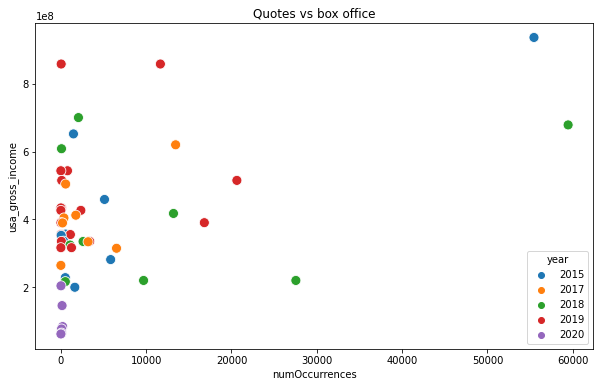

In [78]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)

Check what are the outliers, we have one in 2015, 2018 and 2019

In [80]:
outliers = pd.concat([
movies[movies['year']==2015].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences']),
movies[movies['year']==2018].sort_values('numOccurrences').nlargest(2, columns=['numOccurrences']),
movies[movies['year']==2019].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences'])])
outliers['original_title']

67523       Star Wars: Episode VII - The Force Awakens
73864                           Avengers: Infinity War
76126                    Mission: Impossible - Fallout
67677    Star Wars: Episode IX - The Rise of Skywalker
Name: original_title, dtype: object

<AxesSubplot:title={'center':'Quotes vs box office'}, xlabel='numOccurrences', ylabel='usa_gross_income'>

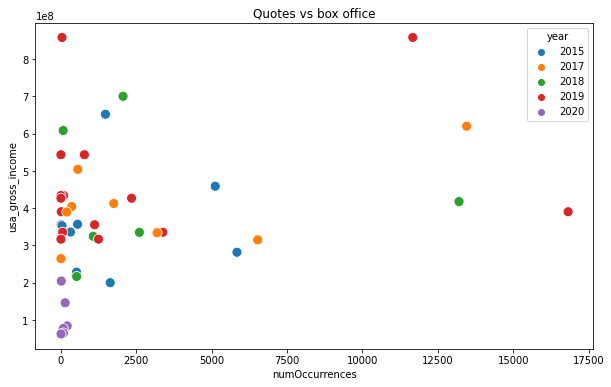

In [81]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
sns.scatterplot(data=movies.drop(index=outliers.index), x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)

Maybe log-log scale?

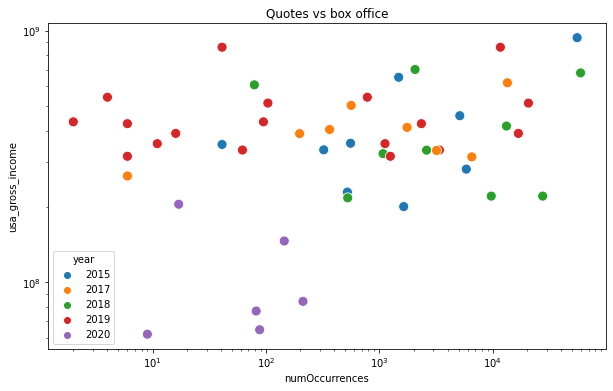

In [86]:
plt.figure(figsize = (10,6))
plt.title('Quotes vs box office')
g = sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)
g.set_xscale('log')
g.set_yscale('log')

In [87]:
all_quotes[all_quotes['speaker'] != 'None'].groupby(['speaker', 'movie']).sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker                     movie                                        
Meghan , Duchess of Sussex  Mission: Impossible - Fallout                    11000
Kathleen Kennedy            Star Wars: Episode IX - The Rise of Skywalker     1219
J.J. Abrams                 Star Wars: Episode VII - The Force Awakens        1160
Kevin Feige                 Avengers: Infinity War                            1119
Kathleen Kennedy            Star Wars: Episode VII - The Force Awakens        1067
J.J. Abrams                 Star Wars: Episode IX - The Rise of Skywalker      878
Peter Parker                Avengers: Infinity War                             875
Carlos Gabriel              Mission: Impossible - Fallout                      817
Kevin Feige                 Avengers: Endgame                                  814
Tom Holland                 Spider-Man: Homecoming                             791
Jon Favreau                 Star Wars: Episode IX - The Rise of Skywalker      730
Gareth Edward

Let's focus on a spesific movie, Star Wars: Episode VII - The Force Awakens

In [88]:
all_quotes[(all_quotes['movie']=='Star Wars: Episode VII - The Force Awakens') & (all_quotes['speaker'] != 'None')].groupby('speaker').sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker
J.J. Abrams               1160
Kathleen Kennedy          1067
George Lucas               691
Bob Iger                   611
John Boyega                591
President Barack Obama     320
Steve Sansweet             304
Lawrence Kasdan            241
Mark Zuckerberg            237
JJ Abrams                  237
Ava DuVernay               189
Steven Spielberg           184
Tan Le                     182
Carrie Fisher              170
Chris Pratt                142
Mark Hamill                138
Patton Oswalt              138
Kate Muir                  136
Gary Grant                 131
Bart Simpson               129
Name: numOccurrences, dtype: int64

We plot the distribution of quotes in time and mark the premier of a the movie with a red line. Also we can observe a spike in the middle of April. It corresponds to the release date of the second teaser trailer on April 16.

<span style="color:red"> This plot does not really work if on the y axis I plot the number of occurences, because the movie title alone is an outlier </span>

<AxesSubplot:title={'center':'Distributions of quotes in time'}, xlabel='date', ylabel='Count'>

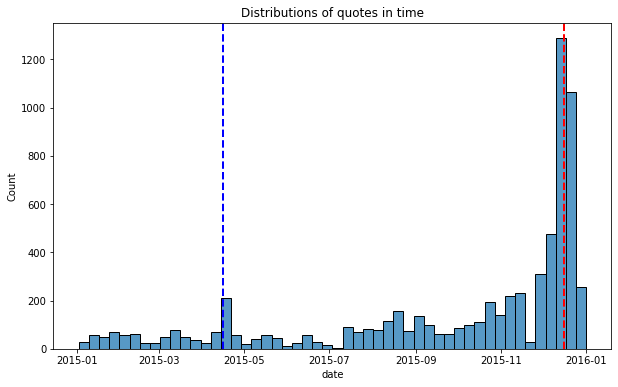

In [107]:
import datetime as dt
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time')
title = 'Star Wars: Episode VII - The Force Awakens'
star_wars = all_quotes[all_quotes['movie']==title]
plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=50)

Again there are clearly spikes when a trailer is released for the movie: 2019 April 12, 2019 Oct 22, 2019 Aug 26

<AxesSubplot:title={'center':'Distributions of quotes in time'}, xlabel='date', ylabel='Count'>

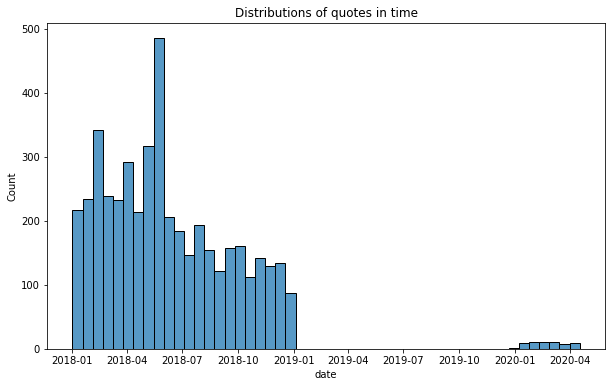

In [110]:
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time')
title = 'Star Wars: Episode IX - The Rise of Skywalker'
star_wars = all_quotes[all_quotes['movie']==title]
#plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
#plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=50)

<AxesSubplot:title={'center':'Avengers Infinity War'}, xlabel='date', ylabel='Count'>

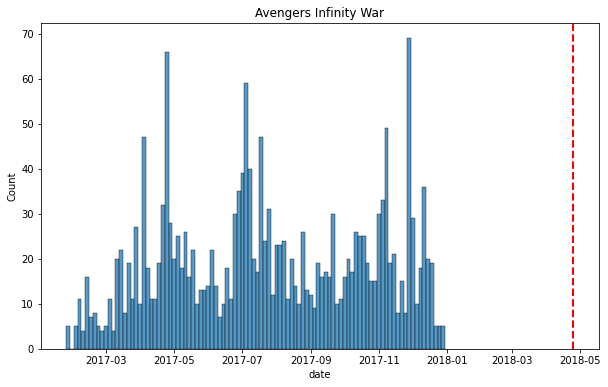

In [112]:
plt.figure(figsize = (10,6))
plt.title('Avengers Infinity War')
title = 'Avengers: Infinity War'
avengers = all_quotes[all_quotes['movie']==title]
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=avengers['date'], bins=100)

In [258]:
#TODO check correlation between box office and quotes
box_office = pd.read_csv('./data/time_series_box_office_data/Avengers_Infinity_War___Box_Office_Mojo.csv')
np.array(avengers.groupby('date').count()['quotation'])

array([  6,   6,   9,   6,   1,   5,  16,   7,   8,   4,  19,   9,   4,
         1,   8,  13,   9,  11,   4,   2,   7,   3,   2,  10,   4,  12,
         1,   5,   2,  11,   4,   4,  10,   7,   4,   4,   8,   8,   8,
         4,   7,   3,   1,   9,   2,  15,  10,   4,   1,   2,  10,   1,
         5,   3,   4,   3,   6,   9,   3,  11,  10,   6,   1,   5,   5,
         9,  13,  20,   4,   3,   7,  16,   3,  26,  33,  27,  10,  27,
        16,  19,  21,  18,   4,   6,  42,   8,  15,   5,   7,   9,  13,
         9,  18,   9,  11,  15,   8,   7,  10,  29,  11,   8,  15,  13,
        13,  25,  23,  16,  24,  20,  16,  17,  77, 100,  68,  50,  58,
        25,  17,  68,  43,  46,  32,  34,  15,  13,  45,  40,  39,  32,
        27,   9,  18,  12,  16,  26,  14,   5,   6,   3,   5,  11,   6,
         3,  10,   5,   8,   4,   6,  12,  10,  11,   5,  11,   8,   8,
         8,   9,  13,   5,   8,  11,   7,  20,  21,  16,   4,   2,  16,
         9,   6,   7,  11,  17,  30,  18,  19,   8,  30,   8,  1